## Задание 1

In [86]:
import warnings
import numpy as np
import pandas as pd
from itertools import cycle, islice
import matplotlib.pyplot as plt
from sklearn import datasets, mixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier

In [35]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
array = X

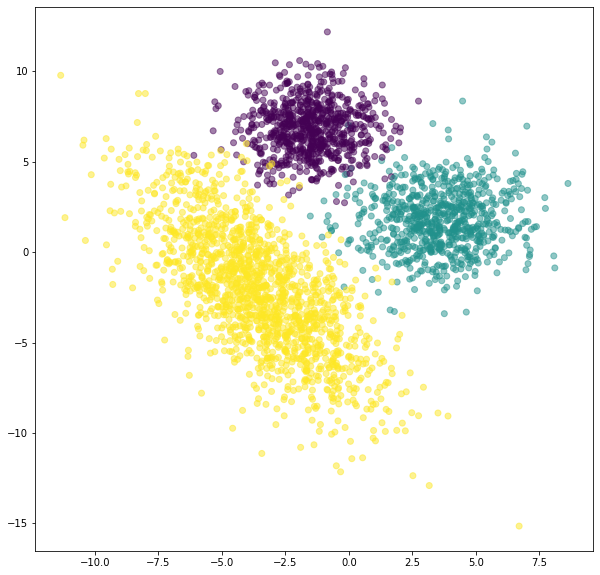

In [36]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [38]:
unique, counts = np.unique(y, return_counts=True)
print(*counts)

750 750 1500


## Задание 1

(3000, 2)

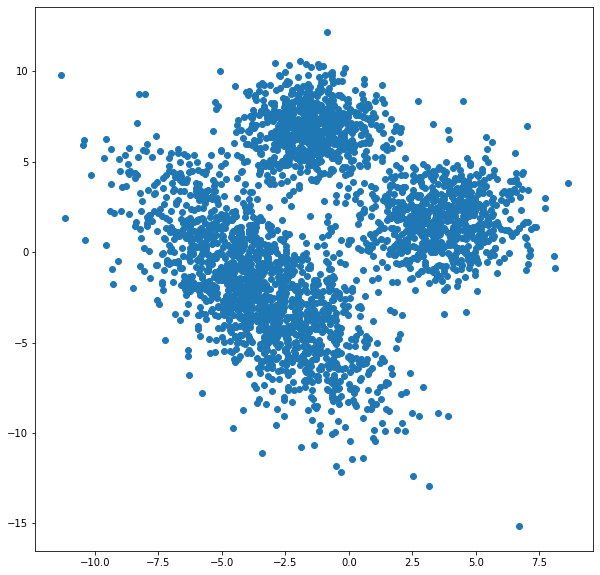

In [39]:
k_means = KMeans(n_clusters=3, init='k-means++', random_state=42)
k_means.fit(array)
plt.scatter(X[:,0],X[:,1])
array.shape

In [40]:
centers = k_means.cluster_centers_

In [41]:
centers

array([[-3.18996384, -2.90484307],
       [-2.38363475,  6.23391526],
       [ 3.6296089 ,  1.74479425]])

## Задание 2

In [116]:
unique, counts = np.unique(y_km, return_counts=True)
print(*counts)

1320 938 742


## Задание 3


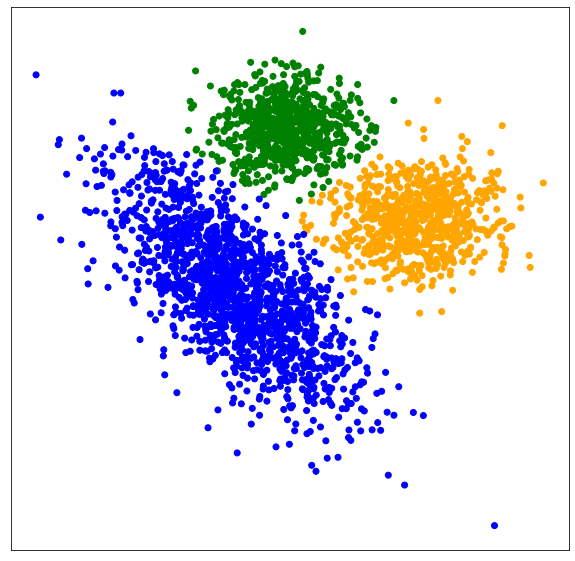

In [120]:
GM = mixture.GaussianMixture(n_components=3,random_state=42)
GM.fit(array)
y_pred = GM.predict(X)
plt.xticks([]); plt.yticks([])
colors = np.array(['orange', 'green', 'blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [46]:
GM.means_

array([[ 3.60809518,  1.73760829],
       [-1.50915711,  6.80752253],
       [-3.54551222, -2.12358327]])

## Задание 4


In [47]:
unique, counts = np.unique(y_pred, return_counts=True)
print(*counts)

744 763 1493


## Задание 5

In [48]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(array)

AgglomerativeClustering(n_clusters=3)

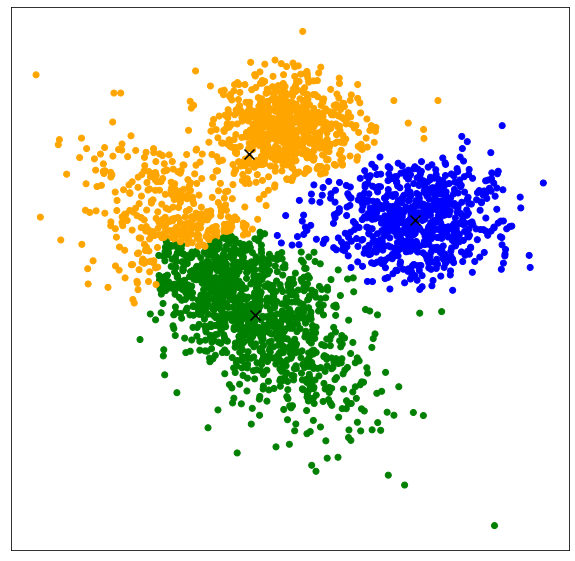

In [123]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)

plt.xticks([])
plt.yticks([])

plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
plt.scatter(X[:,0][y_pred == 0].mean(), X[:,1][y_pred == 0].mean(), color='k', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 1].mean(), X[:,1][y_pred == 1].mean(), color='k', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 2].mean(), X[:,1][y_pred == 2].mean(), color='k', s=100, marker='x')

plt.show()

## Задание 6

In [50]:
unique, counts = np.unique(y_pred, return_counts=True)
print(*counts)

1112 1142 746


## Задание 7

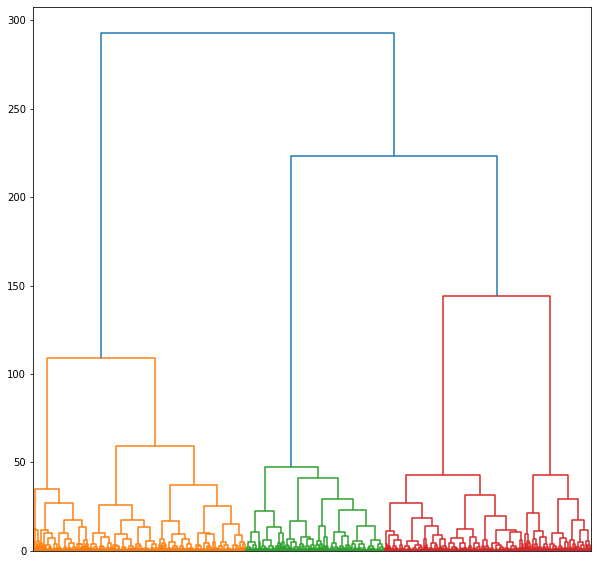

In [51]:
Z = linkage(X, "ward")
dg = dendrogram(Z, no_labels=True)
plt.show()

In [127]:
def CountCluster(dist):
    count = 1

    for i in range(len(dg['dcoord'])):
        if max(dg['dcoord'][i]) >= dist:
            count += 1
    return count

In [128]:
CountCluster(150)

3

In [54]:
CountCluster(100)

5

## Задание 8

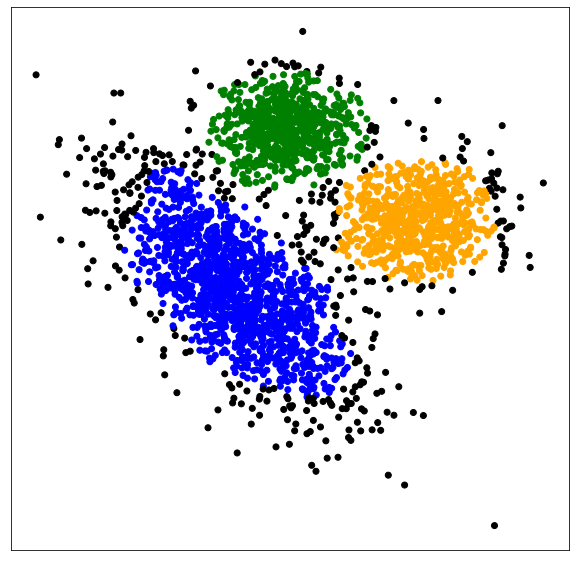

In [129]:
dbscan = DBSCAN(eps=0.9, min_samples=35)

dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
plt.xticks([]); plt.yticks([])
colors = np.array(['orange','green','blue'])
# черные - выбросы
colors = np.append(colors, ['black'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
plt.show()

In [59]:
unique, counts = np.unique(y_pred, return_counts=True)
print(*counts)

368 656 721 1255


## Задание 10

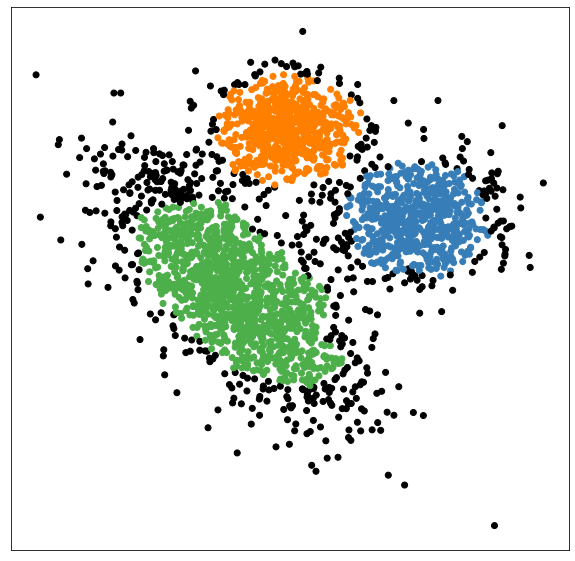

In [61]:
dbscan = DBSCAN(eps=0.8, min_samples=35)

dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
plt.xticks([]); plt.yticks([])
colors = np.array(['orange','green','blue'])
# чёрные - выбросы
colors = np.append(colors, ['black'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
plt.show()

In [62]:
unique, counts = np.unique(y_pred, return_counts=True)
print(*counts)

583 603 681 1133


## Задание 11

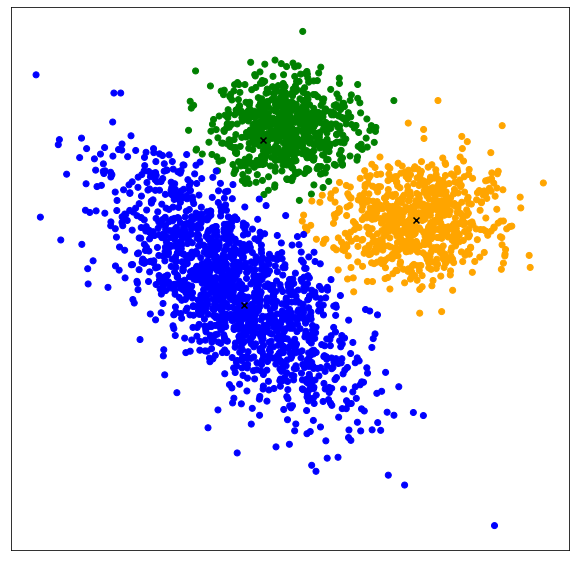

In [132]:
em_gm = GaussianMixture(n_components=3, 
                        init_params='kmeans', # 'kmeans’, ‘random’
                        random_state = 42
                       )
em_gm.fit(X)
y_pred = em_gm.predict(X)

plt.xticks([]); plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], color='k', marker = 'x')
plt.show()

## Задание 12

In [67]:
mas ={}

k_means = KMeans(n_clusters=3, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 random_state = 42)
k_means.fit(X)
y_pred = k_means.labels_.astype(np.int32)
mas[0] = silhouette_score(X=X, labels=y_pred, metric='euclidean')

In [68]:
em_gm = GaussianMixture(n_components=3, 
                        init_params='kmeans', # 'kmeans’, ‘random’
                        random_state = 42
                       )
em_gm.fit(X)
y_pred = em_gm.predict(X)
mas[1] = silhouette_score(X=X, labels=y_pred, metric='euclidean')

In [70]:
ac = AgglomerativeClustering(n_clusters=3)

ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
mas[2] = silhouette_score(X=X, labels=y_pred, metric='euclidean')

In [71]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
mas[3] = silhouette_score(X=X, labels=y_pred, metric='euclidean')

In [72]:
print('Коэффициенты силуэта:')
print('К-means:', mas[0])
print('EM-алгоритм:', mas[1])
print('Агломеративная кластеризация:', mas[2])
print('DBSCAN:', mas[3])
print('Макс. значение:', max(mas.values()))

Коэффициенты силуэта:
К-means: 0.5131209788437305
EM-алгоритм: 0.49893287606943293
Агломеративная кластеризация: 0.4811992210663849
DBSCAN: 0.4454335539277996
Максимальное значение: 0.5131209788437305


## Задание 13

In [77]:
mas=[]
for i in range(2,10+1):
    k_means = KMeans(n_clusters=i, 
                 init='k-means++',
                 random_state = 42)
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int32)
    mas_k_means = silhouette_score(X=X, labels=y_pred, metric='euclidean')

    em_gm = GaussianMixture(n_components=i, 
                        init_params='kmeans', # 'kmeans’, ‘random’
                        random_state = 42)
    em_gm.fit(X)
    y_pred = em_gm.predict(X)
    mas_em_gm = silhouette_score(X=X, labels=y_pred, metric='euclidean')

    ac = AgglomerativeClustering(n_clusters=i)
    ac.fit(X)
    y_pred = ac.labels_.astype(np.int32)
    mas_ac = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    
    mas.append([mas_k_means, mas_em_gm, mas_ac])
print(mas)

[[0.4553109501667062, 0.45506572865005773, 0.40560374862968174], [0.5131209788437305, 0.49893287606943293, 0.4811992210663849], [0.5114911234090096, 0.510682306926087, 0.48470679039805054], [0.48124147837648434, 0.481377079675046, 0.4732978942735451], [0.4617161738600555, 0.462912077774331, 0.4360547281175275], [0.39702814018472976, 0.44345594385628, 0.3610107002721555], [0.33335049057121036, 0.32796642598251413, 0.3470279907723165], [0.3295856272928711, 0.3096981122180304, 0.27831000812401474], [0.3325217295314097, 0.30558600896830485, 0.281314682459535]]


In [133]:
k_means = []
em_gm = []
ac = []

for i in range(len(mas)):
    k_means.append(mas[i][0])
    em_gm.append(mas[i][1])
    ac.append(mas[i][2])

count_k_means = k_means.index(max(k_means)) + 2
count_em_gm = em_gm.index(max(em_gm)) + 2
count_ac = ac.index(max(ac)) + 2

print('Макс коэф. силуэта K-means =', max(k_means), 'при', count_k_means, 'кластерах')
print('Макс коэф. силуэта EM-алгоритма =', max(em_gm), 'при', count_em_gm, 'кластерах')
print('Макс коэф. силуэта Агломеративной кластеризации =', max(ac), 'при', count_ac, 'кластерах')

Макс коэф. силуэта K-means = 0.5131209788437305 при 3 кластерах
Макс коэф. силуэта EM-алгоритма = 0.510682306926087 при 4 кластерах
Макс коэф. силуэта Агломеративной кластеризации = 0.48470679039805054 при 4 кластерах


## Задание 14

In [88]:
em_gm = GaussianMixture(n_components=3, 
                        init_params='kmeans', # 'kmeans’, ‘random’
                        random_state = 42)
em_gm.fit(X)
y_pred = em_gm.predict(X)

# однородность
gm_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)

print('Однородность = ', gm_hs)

Однородность =  0.9339791347507893


## Задание 15

In [93]:
k_means = KMeans(n_clusters=i, 
                init='k-means++',
                random_state = 42)
k_means.fit(X)
y_pred = k_means.labels_.astype(np.int32)
# однородность
k_means_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)

em_gm = GaussianMixture(n_components=i, 
                    init_params='kmeans', # 'kmeans’, ‘random’
                    random_state = 42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
# однородность
em_gm_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)

ac = AgglomerativeClustering(n_clusters=i)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
# однородность
ac_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
# однородность
db_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)

print('K-means =', k_means_hs)
print('EM-алгоритма =', em_gm_hs)
print('Агломеративной кластеризации =', ac_hs)
print('DBSCAN =', db_hs)

hs = {'K-means': k_means_hs, 'EM-алгоритм': em_gm_hs, 'Агломеративная кластеризация': ac_hs, 'DBSCANs': db_hs}
max_hs = max(hs.values())
print('Max HS =', max_hs)

K-means = 0.9283581562262537
EM-алгоритма = 0.9406234403909411
Агломеративной кластеризации = 0.9214513286319151
DBSCAN = 0.8689356473867522
Max HS = 0.9406234403909411


## Задание 16

In [94]:
em_gm = GaussianMixture(n_components=3, 
                        init_params='kmeans', # 'kmeans’, ‘random’
                        random_state = 42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
em_gm_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('Однородность =', em_gm_hs)
em_gm_cs = completeness_score(labels_true=y, labels_pred=y_pred)
print('Полнота =', em_gm_cs)
em_gm_vms = v_measure_score(labels_true=y, labels_pred=y_pred)
print('V-мера =', em_gm_vms)

Однородность = 0.9339791347507893
Полнота = 0.9325740421656737
V-мера = 0.9332760595996924


## Задание 17

In [99]:
k_means = KMeans(n_clusters=i, 
                init='k-means++',
                random_state = 42)
k_means.fit(X)
y_pred = k_means.labels_.astype(np.int32)
k_means_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)
k_means_cs = completeness_score(labels_true=y, labels_pred=y_pred)
k_means_vms = v_measure_score(labels_true=y, labels_pred=y_pred)

em_gm = GaussianMixture(n_components=i, 
                    init_params='kmeans', # 'kmeans’, ‘random’
                    random_state = 42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
em_gm_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)
em_gm_cs = completeness_score(labels_true=y, labels_pred=y_pred)
em_gm_vms = v_measure_score(labels_true=y, labels_pred=y_pred)

ac = AgglomerativeClustering(n_clusters=i)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
ac_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)
ac_cs = completeness_score(labels_true=y, labels_pred=y_pred)
ac_vms = v_measure_score(labels_true=y, labels_pred=y_pred)

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
db_hs = homogeneity_score(labels_true=y, labels_pred=y_pred)
db_cs = completeness_score(labels_true=y, labels_pred=y_pred)
db_vms = v_measure_score(labels_true=y, labels_pred=y_pred)

print('\nОднородность:')
print('K-means =', k_means_hs)
print('EM-алгоритма =', em_gm_hs)
print('Агломеративной кластеризации =', ac_hs)
print('DBSCAN =', db_hs)

hs = {'K-means': k_means_hs, 'EM-алгоритм': em_gm_hs, 'Агломеративная кластеризация': ac_hs, 'DBSCANs': db_hs}
maxHS = max(hs.values())
print('Максимальное значение =', maxHS)

print('\nПолнота:')
print('K-means =', k_means_cs)
print('EM-алгоритма =', em_gm_cs)
print('Агломеративной кластеризации =', ac_cs)
print('DBSCAN =', db_cs)

cs = {'K-means': k_means_cs, 'EM-алгоритм': em_gm_cs, 'Агломеративная кластеризация': ac_cs, 'DBSCANs': db_cs}
maxCS = max(cs.values())
print('Максимальное значение =', maxCS)

print('\nV-мера:')
print('K-means =', k_means_vms)
print('EM-алгоритма =', em_gm_vms)
print('Агломеративной кластеризации =', ac_vms)
print('DBSCAN =', db_vms)

vms = {'K-means': k_means_vms, 'EM-алгоритм': em_gm_vms, 'Агломеративная кластеризация': ac_vms, 'DBSCANs': db_vms}
max_vms = max(vms.values())
print('Максимальное значение =', max_vms)


Однородность:
K-means = 0.9283581562262537
EM-алгоритма = 0.9406234403909411
Агломеративной кластеризации = 0.9214513286319151
DBSCAN = 0.8689356473867522
Максимальное значение = 0.9406234403909411

Полнота:
K-means = 0.4721611172852105
EM-алгоритма = 0.4816190231088118
Агломеративной кластеризации = 0.4909944267717615
DBSCAN = 0.6965554058940557
Максимальное значение = 0.6965554058940557

V-мера:
K-means = 0.6259601457473807
EM-алгоритма = 0.6370533212172136
Агломеративной кластеризации = 0.640629865138292
DBSCAN = 0.7732549110297919
Максимальное значение = 0.7732549110297919


## Задание 18

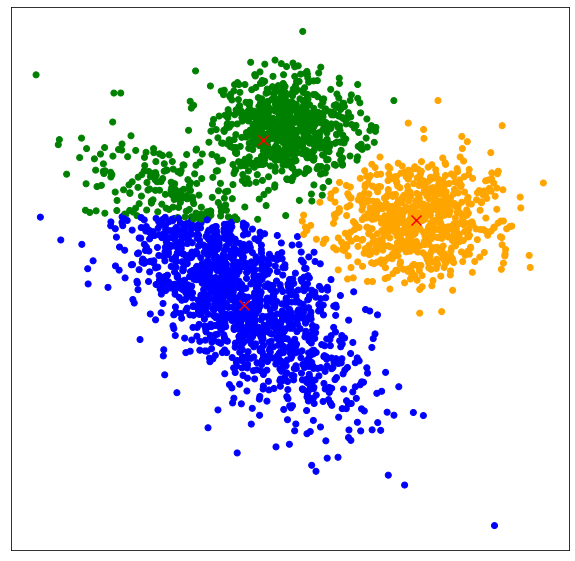

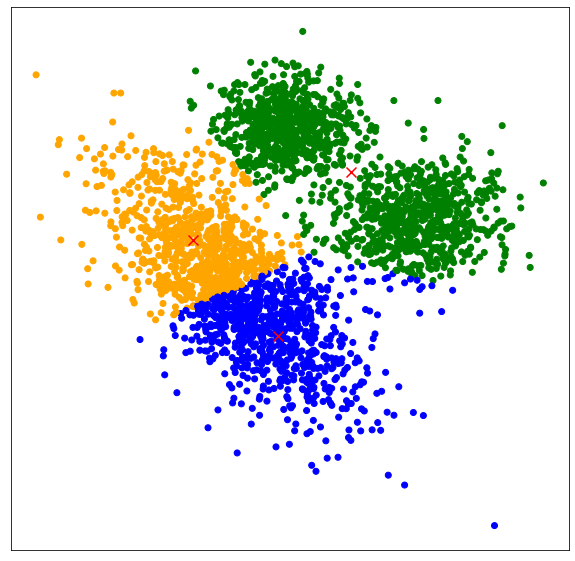

V-мера (k-means++) = 0.7911556191133551
V-мера (random)= 0.5990620007488798

Максимальное значение V-меры = 0.7911556191133551


In [139]:
k_means_plus = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
k_means_plus.fit(X)
y_pred_plus = k_means_plus.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred_plus])
plt.scatter(k_means_plus.cluster_centers_[:,0], k_means_plus.cluster_centers_[:,1], color='red', s=100, marker='x')

plt.show()
k_means_random = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
k_means_random.fit(X)
y_pred_random = k_means_random.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred_random])
plt.scatter(k_means_random.cluster_centers_[:,0], k_means_random.cluster_centers_[:,1], color='red', s=100, marker='x')

plt.show()
# теперь посчитаем V-меру для k-means++
k_vms_plus = v_measure_score(labels_true=y, labels_pred=y_pred_plus)
print('V-мера (k-means++) =', k_vms_plus)
# теперь посчитаем V-меру для random
k_vms_random = v_measure_score(labels_true=y, labels_pred=y_pred_random)
print('V-мера (random)=', k_vms_random)

vms = {'K-means++': k_vms_plus, 'K-means': k_vms_random}
maxVMS = max(vms.values())
print('\nМаксимальное значение V-меры =', maxVMS)

## Задание 19

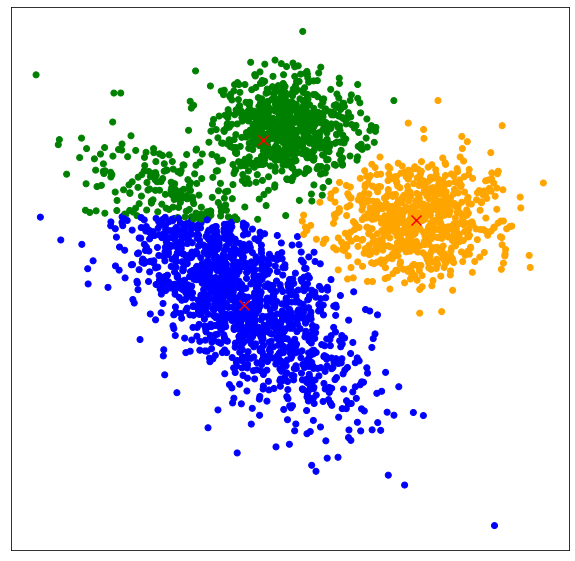

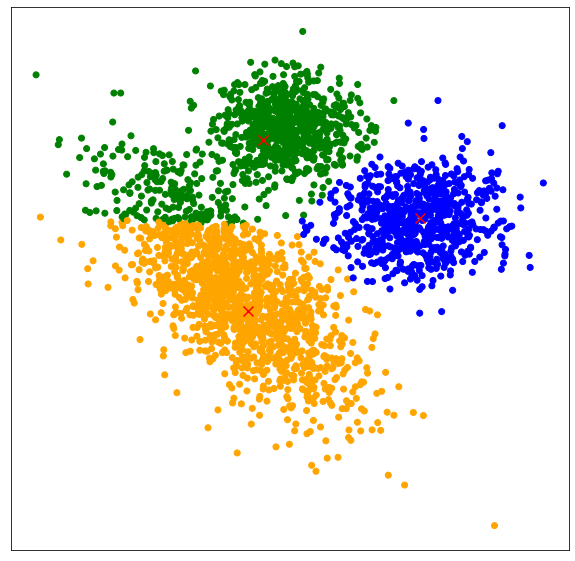

V-мера (KMeans)= 0.7911556191133551
V-мера = 0.7754479579707602
Максимальное значение V-меры = 0.7911556191133551


In [138]:
k_means = KMeans(n_clusters=3, n_init=1, random_state=42)
k_means.fit(X)
y_pred_k = k_means.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred_k])
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color='red', s=100, marker='x')

plt.show()
mini_k = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=4)
mini_k.fit(X)
y_pred_mini = mini_k.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred_mini])
plt.scatter(mini_k.cluster_centers_[:,0], mini_k.cluster_centers_[:,1], color='red', s=100, marker='x')

plt.show()
# теперь посчитаем V-меру для KMeans
k_vms = v_measure_score(labels_true=y, labels_pred=y_pred_k)
print('V-мера (KMeans)=', k_vms)
# теперь посчитаем V-меру для MiniBatchKMeans
mini_vms = v_measure_score(labels_true=y, labels_pred=y_pred_mini)
print('V-мера =', mini_vms)

vms = {'K-means': k_vms, 'MiniBatchKMeans': mini_vms}
maxVMS = max(vms.values())
print('Максимальное значение V-меры =', maxVMS)

## Задание 20

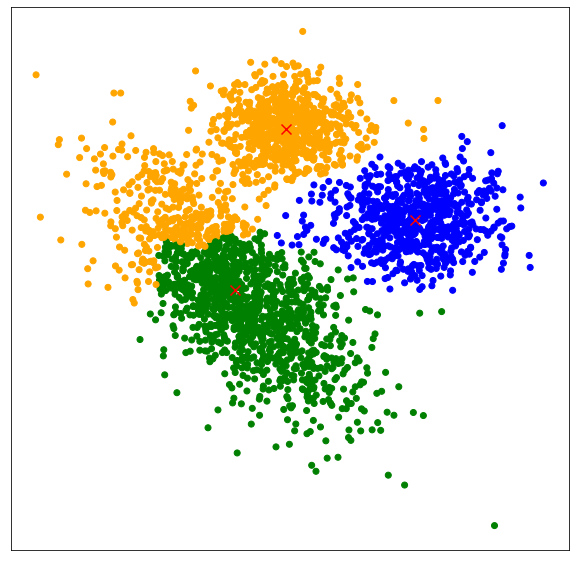

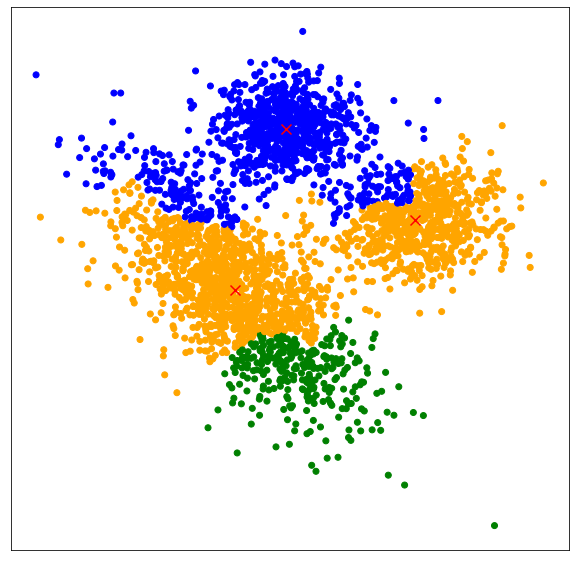

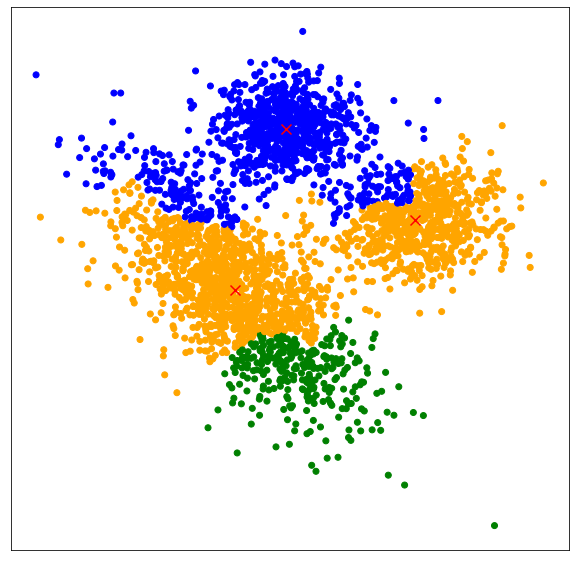

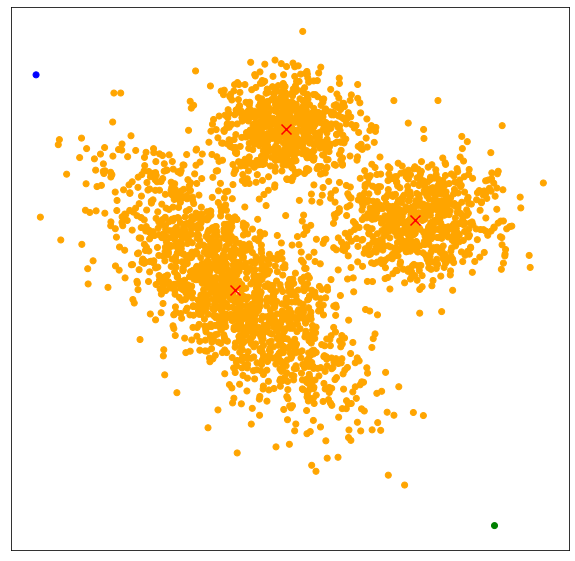

In [142]:
ac_w = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac_w.fit(X)
ypred_w = ac_w.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[ypred_w])
plt.scatter(X[:,0][y_pred == 0].mean(), X[:,1][y_pred == 0].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 1].mean(), X[:,1][y_pred == 1].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 2].mean(), X[:,1][y_pred == 2].mean(), color='red', s=100, marker='x')
plt.show()
ac_c = AgglomerativeClustering(n_clusters=3, linkage='complete')
ac_c.fit(X)
ypred_c = ac_c.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[ypred_c])
plt.scatter(X[:,0][y_pred == 0].mean(), X[:,1][y_pred == 0].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 1].mean(), X[:,1][y_pred == 1].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 2].mean(), X[:,1][y_pred == 2].mean(), color='red', s=100, marker='x')

plt.show()
ac_c = AgglomerativeClustering(n_clusters=3, linkage='complete')
ac_c.fit(X)
ypred_c = ac_c.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[ypred_c])
plt.scatter(X[:,0][y_pred == 0].mean(), X[:,1][y_pred == 0].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 1].mean(), X[:,1][y_pred == 1].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 2].mean(), X[:,1][y_pred == 2].mean(), color='red', s=100, marker='x')

plt.show()
ac_s = AgglomerativeClustering(n_clusters=3, linkage='single')
ac_s.fit(X)
ypred_s = ac_s.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue'])
plt.scatter(X[:, 0], X[:, 1], color=colors[ypred_s])
plt.scatter(X[:,0][y_pred == 0].mean(), X[:,1][y_pred == 0].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 1].mean(), X[:,1][y_pred == 1].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 2].mean(), X[:,1][y_pred == 2].mean(), color='red', s=100, marker='x')

plt.show()


## Задание 21

In [111]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
db_vms08 = v_measure_score(labels_true=y, labels_pred=y_pred)
print('eps 0.8 =', db_vms08)

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
db_vms09 = v_measure_score(labels_true=y, labels_pred=y_pred)
print('eps 0.9 =', db_vms09)

vms = {'0.8': db_vms08, '0.9': db_vms09}
max_vms = max(vms.values())
print('\nMax V-мера =', max_vms)

eps 0.8 = 0.7063100442576922
eps 0.9 = 0.7732549110297919

Max V-мера = 0.7732549110297919


## Задание 22

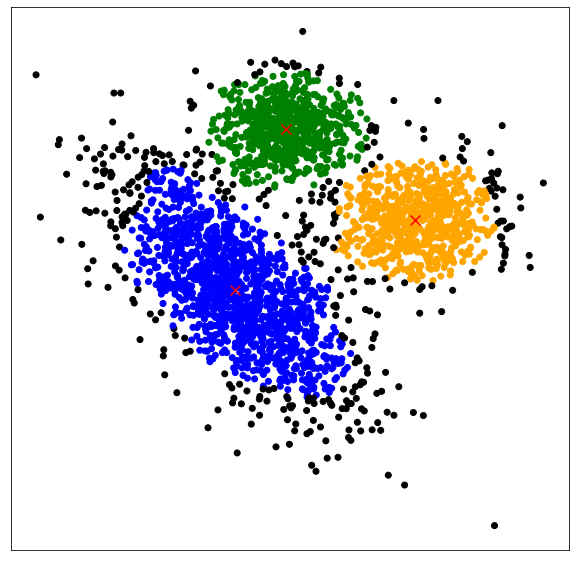

V-мера = 0.9667281300681958


In [141]:
dbscan = DBSCAN(eps=0.9,min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int32)
plt.xticks([])
plt.yticks([])
colors = np.array(['orange','green','blue', 'black'])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
plt.scatter(X[:,0][y_pred == 0].mean(), X[:,1][y_pred == 0].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 1].mean(), X[:,1][y_pred == 1].mean(), color='red', s=100, marker='x')
plt.scatter(X[:,0][y_pred == 2].mean(), X[:,1][y_pred == 2].mean(), color='red', s=100, marker='x')

plt.show()
y_pred_new = np.delete(y_pred, np.where(y_pred == [-1]), axis=0)
y_new = np.delete(y, np.where(y_pred == [-1]), axis=0)
vms = v_measure_score(labels_true=y_new, labels_pred=y_pred_new)
print('V-мера =', vms)

## Задание 23

In [115]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
ac_vms_wnorm = v_measure_score(labels_true=y, labels_pred=y_pred)
print('V-мера (без нормализации) =', ac_vms_wnorm)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
ac_vms_stnorm = v_measure_score(labels_true=y, labels_pred=y_pred)
print('V-мера (стандарт.нормализация) =', ac_vms_stnorm)

vms = [ac_vms_wnorm, ac_vms_stnorm]
maxVMS = max(vms)
print('\nМаксимальное значение V-меры =', maxVMS)

V-мера (без нормализации) = 0.703747024360433
V-мера (стандарт.нормализация) = 0.703747024360433

Максимальное значение V-меры = 0.703747024360433


## Задание 24

In [145]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
ac_vms_noNorm = v_measure_score(labels_true=y, labels_pred=y_pred)
print('V-мера (без нормализации) =', ac_vms_noNorm)
ac.fit(X)
y_pred = ac.labels_.astype(np.int32)
ac_vms_MMS = v_measure_score(labels_true=y, labels_pred=y_pred)
print('V-мера (MinMax нормализация) =', ac_vms_MMS)

vms = {'noNorm': ac_vms_noNorm, 'MMS': ac_vms_MMS}
maxVMS = max(vms.values())
print('\nМаксимальное значение V-меры =', maxVMS)

V-мера (без нормализации) = 0.703747024360433
V-мера (MinMax нормализация) = 0.703747024360433

Максимальное значение V-меры = 0.703747024360433
